In [20]:
import ace_tools as tools
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'ace_tools'

In [4]:
import pandas as pd

file_path = '/results-survey551398.csv'  # Update with your actual path
data = pd.read_csv(file_path)

print(data.head())

   Response ID       Date submitted  Last page Start language        Seed  \
0            1  2025-01-24 14:54:49        3.0             en   106248719   
1            2  2025-01-24 15:30:37        3.0             en   284086652   
2            3                  NaN        NaN             en   332508297   
3            4  2025-01-24 16:10:55        3.0             en  1742724786   
4            5  2025-01-24 15:58:15        3.0             en  1753103952   

          Date started     Date last action  \
0  2025-01-24 14:01:05  2025-01-24 14:54:49   
1  2025-01-24 15:19:10  2025-01-24 15:30:37   
2  2025-01-24 15:22:08  2025-01-24 15:22:08   
3  2025-01-24 15:22:33  2025-01-24 16:10:55   
4  2025-01-24 15:34:49  2025-01-24 15:58:15   

                                IP address To which age group do you belong?   \
0                           136.199.222.43                              25-34   
1                            141.2.113.130                              18-24   
2    2a00:1

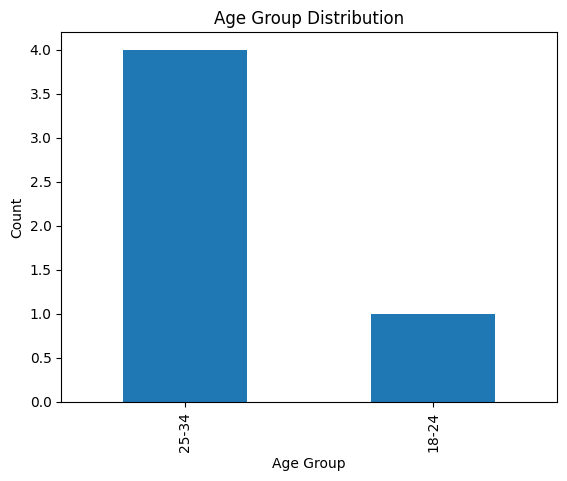

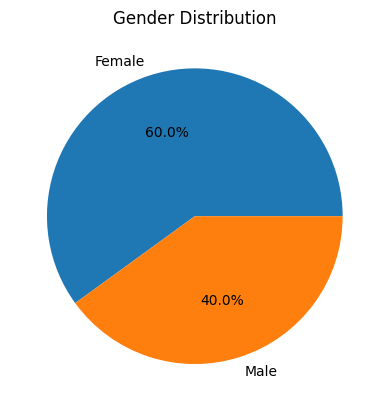

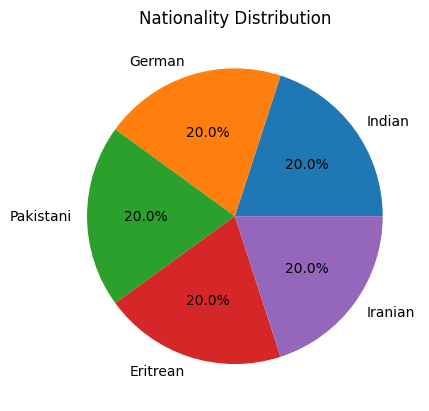

Demographic summary saved as 'demographic_summary.csv'.


In [23]:
# Correcting the file path and reloading the survey dataset
file_path = '/results-survey551398.csv'
survey_data = pd.read_csv(file_path)

# Strip extra spaces in column names
survey_data.columns = survey_data.columns.str.strip()

# Redefine demographic data
demographics_columns = [
    "Response ID",
    "To which age group do you belong?",
    "What is your gender?",
    "What is your nationality? Please select from the dropdown menu."
]
demographics_data = survey_data[demographics_columns]

# Generate summary
demographics_summary = demographics_data.groupby(
    ["To which age group do you belong?", "What is your gender?", "What is your nationality? Please select from the dropdown menu."]
).size().reset_index(name='Count')

# Visualize age group distribution
import matplotlib.pyplot as plt

demographics_data["To which age group do you belong?"].value_counts().plot(kind='bar')
plt.title("Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

# Visualize gender distribution
demographics_data["What is your gender?"].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()

# Visualize nationality distribution
demographics_data["What is your nationality? Please select from the dropdown menu."].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Nationality Distribution")
plt.ylabel("")
plt.show()

# Save demographic summary to a CSV file
output_file = "demographic_summary.csv"
demographics_summary.to_csv(output_file, index=False)
print(f"Demographic summary saved as '{output_file}'.")


<ipython-input-29-94eb64f6342e>:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  education_fields_data = survey_data[education_fields].replace({"Yes": 1, "No": 0}).fillna(0)
<ipython-input-29-94eb64f6342e>:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  education_levels_data = survey_data[education_levels].replace({"Yes": 1, "No": 0}).fillna(0)
<ipython-input-29-94eb64f6342e>:45: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(

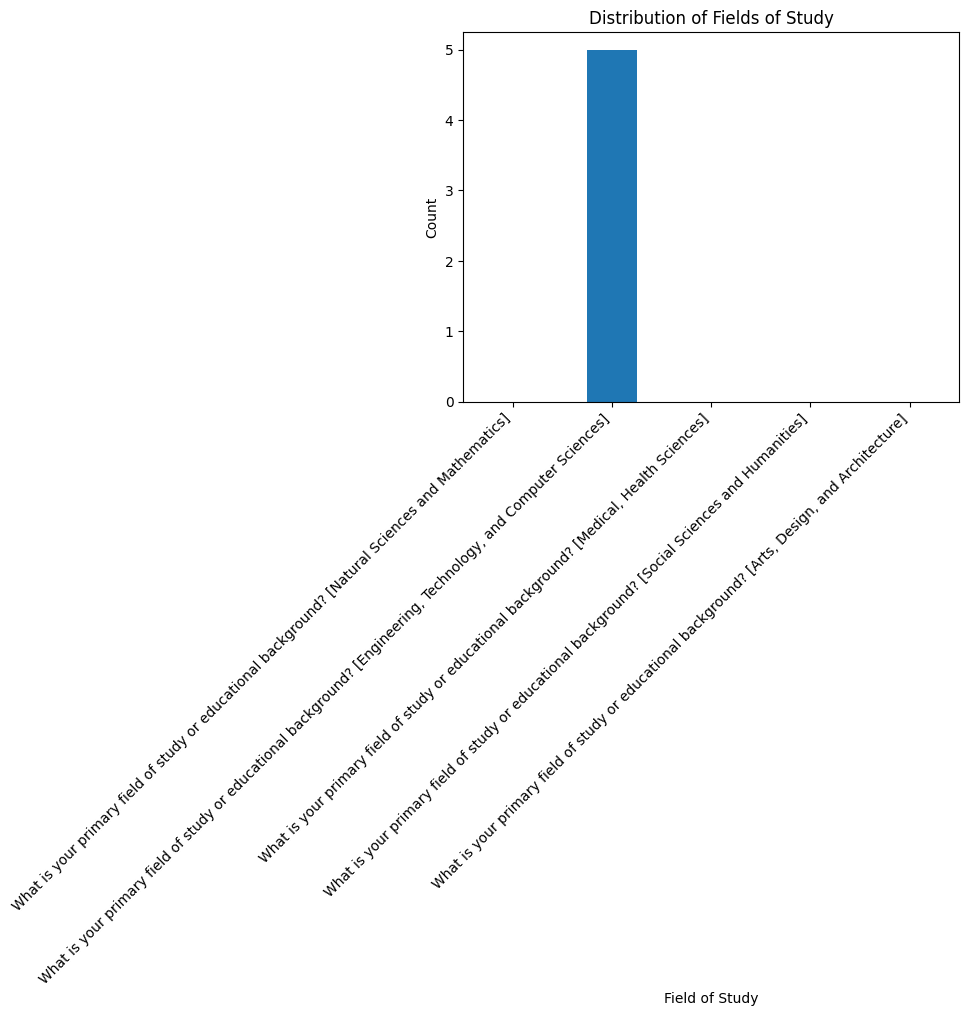

<ipython-input-29-94eb64f6342e>:54: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


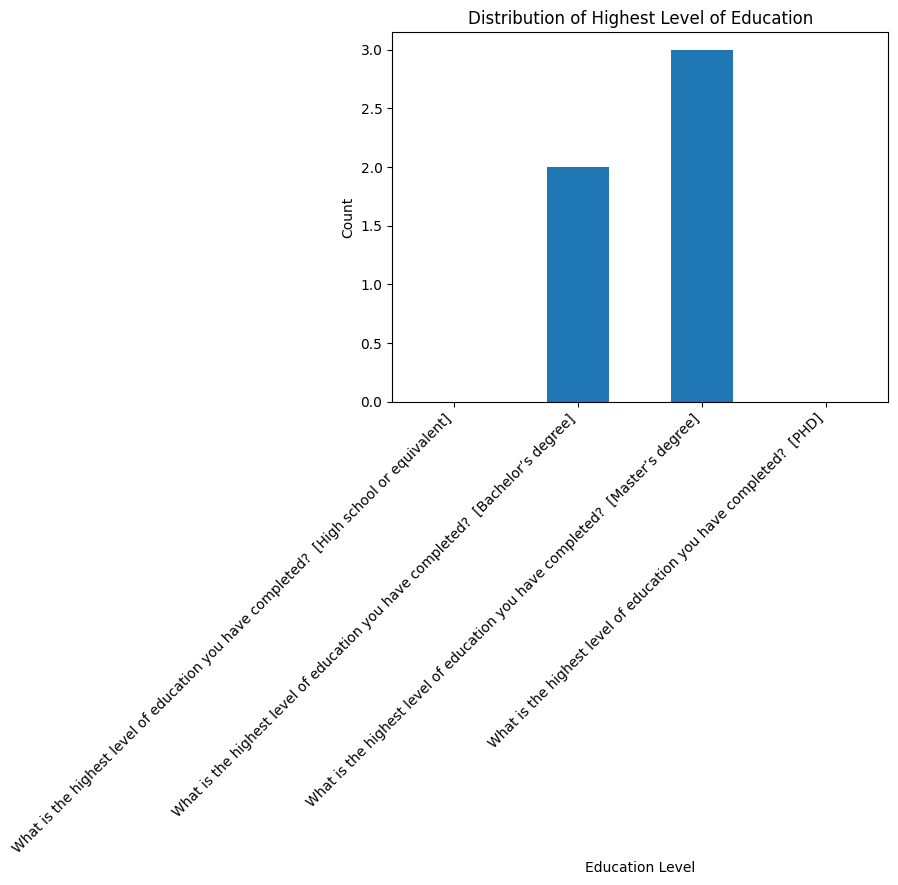

Summaries saved as 'field_of_study_summary.csv' and 'education_level_summary.csv'


In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/results-survey551398.csv'
survey_data = pd.read_csv(file_path)

# Strip extra spaces in column names
survey_data.columns = survey_data.columns.str.strip()

# Define fields for educational background and level of education
education_fields = [
    "What is your primary field of study or educational background? [Natural Sciences and Mathematics]",
    "What is your primary field of study or educational background? [Engineering, Technology, and Computer Sciences]",
    "What is your primary field of study or educational background? [Medical, Health Sciences]",
    "What is your primary field of study or educational background? [Social Sciences and Humanities]",
    "What is your primary field of study or educational background? [Arts, Design, and Architecture]",
]

education_levels = [
    "What is the highest level of education you have completed?  [High school or equivalent]",
    "What is the highest level of education you have completed?  [Bachelor’s degree]",
    "What is the highest level of education you have completed?  [Master’s degree]",
    "What is the highest level of education you have completed?  [PHD]",
]

# Convert "Yes" to 1 and "No" to 0
education_fields_data = survey_data[education_fields].replace({"Yes": 1, "No": 0}).fillna(0)
education_levels_data = survey_data[education_levels].replace({"Yes": 1, "No": 0}).fillna(0)

# Summarize educational fields
education_field_counts = education_fields_data.sum().reset_index()
education_field_counts.columns = ["Field of Study", "Count"]

# Summarize education levels
education_level_counts = education_levels_data.sum().reset_index()
education_level_counts.columns = ["Education Level", "Count"]

# Plot educational background (fields of study)
education_field_counts.set_index("Field of Study").plot(kind='bar', legend=False)
plt.title("Distribution of Fields of Study")
plt.xlabel("Field of Study")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Plot highest level of education
education_level_counts.set_index("Education Level").plot(kind='bar', legend=False)
plt.title("Distribution of Highest Level of Education")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Save summaries as CSV files for reference
education_field_counts.to_csv("field_of_study_summary.csv", index=False)
education_level_counts.to_csv("education_level_summary.csv", index=False)
print("Summaries saved as 'field_of_study_summary.csv' and 'education_level_summary.csv'")


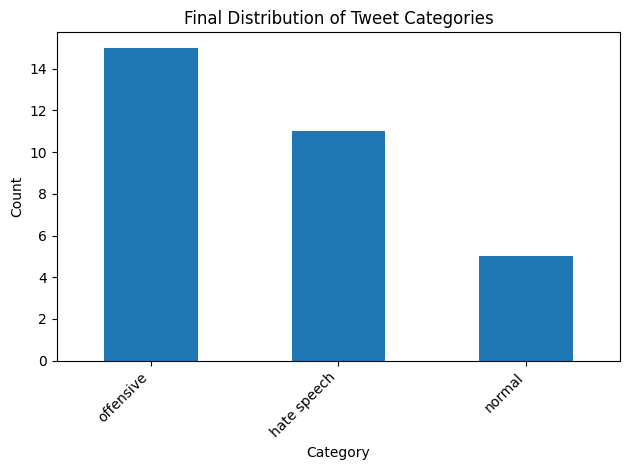

Final tweet category summary saved as 'final_tweet_category_summary.csv'.


In [31]:
# Re-define the tweet labels variable
tweet_labels = [col for col in survey_data.columns if "label" in col.lower()]

# Standardize the labels to ensure no duplicates
cleaned_labels = pd.Series(
    [label.split(":")[-1].strip().lower().replace("hatespeech", "hate speech") for label in tweet_labels]
).value_counts().reset_index()
cleaned_labels.columns = ["Category", "Count"]

# Plot the final corrected distribution of tweet categories
cleaned_labels.set_index("Category").plot(kind='bar', legend=False)
plt.title("Final Distribution of Tweet Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Save the final cleaned summary as a CSV file
cleaned_labels.to_csv("final_tweet_category_summary.csv", index=False)
print("Final tweet category summary saved as 'final_tweet_category_summary.csv'.")


<ipython-input-32-097f0e9aa0a6>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  explanation_reasons_data = survey_data[explanation_reason_columns].replace({"Yes": 1, "No": 0}).fillna(0)
<ipython-input-32-097f0e9aa0a6>:23: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


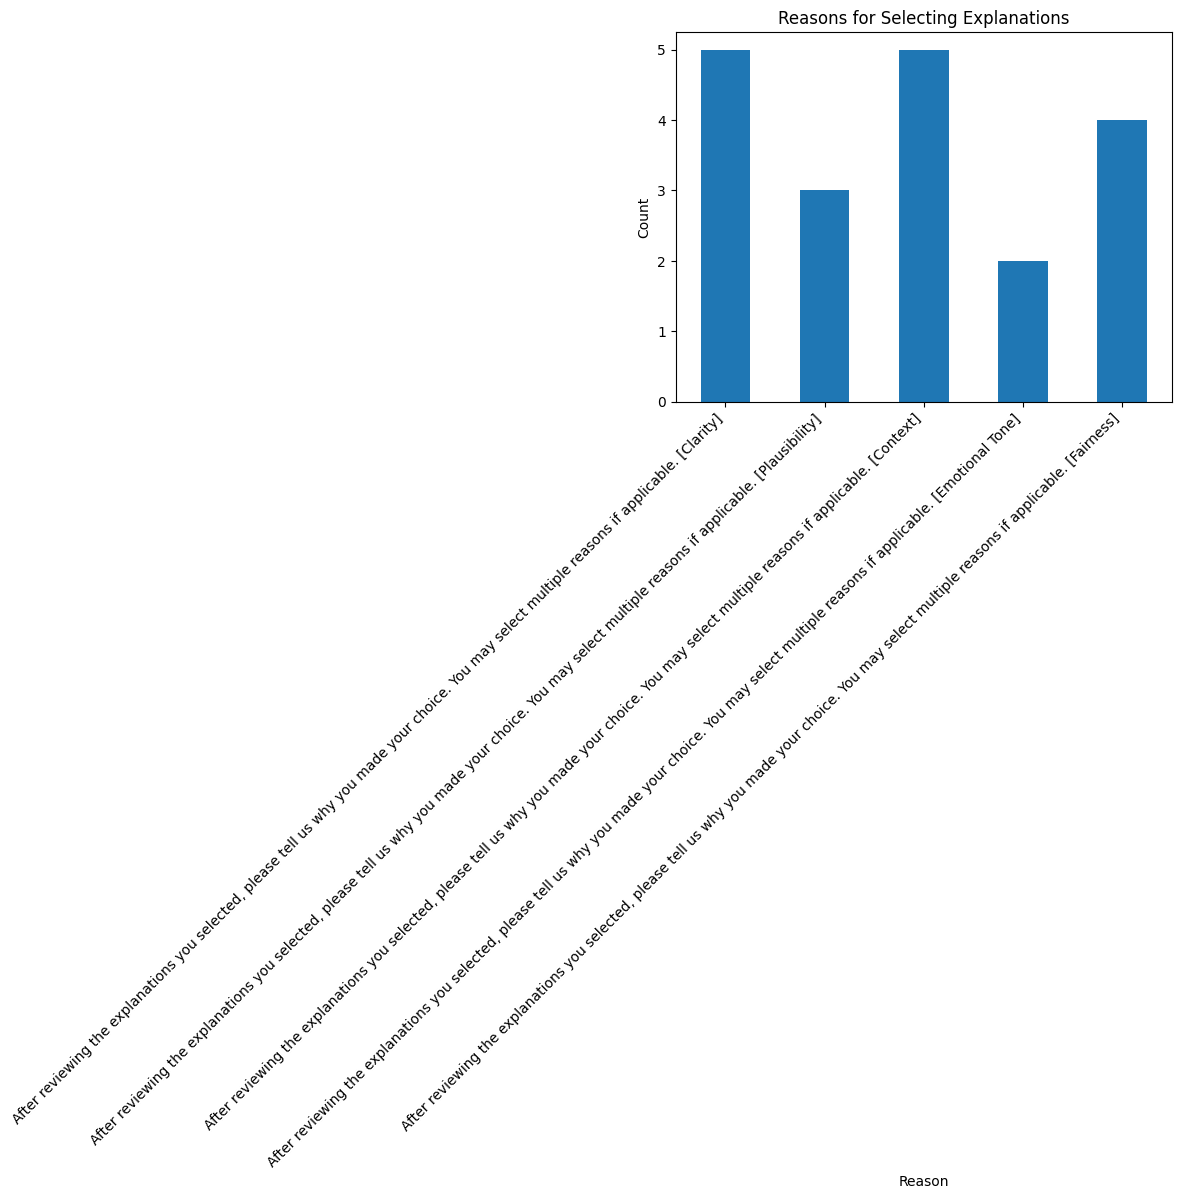

Explanations reasons summary saved as 'explanation_reasons_summary.csv'.


In [32]:
# Define columns for reasons behind explanation selection
explanation_reason_columns = [
    "After reviewing the explanations you selected, please tell us why you made your choice. You may select multiple reasons if applicable. [Clarity]",
    "After reviewing the explanations you selected, please tell us why you made your choice. You may select multiple reasons if applicable. [Plausibility]",
    "After reviewing the explanations you selected, please tell us why you made your choice. You may select multiple reasons if applicable. [Context]",
    "After reviewing the explanations you selected, please tell us why you made your choice. You may select multiple reasons if applicable. [Emotional Tone]",
    "After reviewing the explanations you selected, please tell us why you made your choice. You may select multiple reasons if applicable. [Fairness]",
]

# Convert "Yes" to 1 and "No" to 0 for binary representation of reasons
explanation_reasons_data = survey_data[explanation_reason_columns].replace({"Yes": 1, "No": 0}).fillna(0)

# Summarize reasons for selecting explanations
explanation_reason_counts = explanation_reasons_data.sum().reset_index()
explanation_reason_counts.columns = ["Reason", "Count"]

# Visualize reasons for selecting explanations
explanation_reason_counts.set_index("Reason").plot(kind='bar', legend=False)
plt.title("Reasons for Selecting Explanations")
plt.xlabel("Reason")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Save the summary of reasons as a CSV file
explanation_reason_counts.to_csv("explanation_reasons_summary.csv", index=False)
print("Explanations reasons summary saved as 'explanation_reasons_summary.csv'.")


In [ ]:
#QUESTION TO THE TEAM
#HOW SHOULD WE VISUALIZE THE EXPLANATION RESULTS?